<a href="https://colab.research.google.com/github/jaber10000/Primary-Machine-Learning/blob/MyCodeDemo/Regression_for_contest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train= pd.read_csv('/content/train.csv')
test= pd.read_csv('/content/test.csv')
sample= pd.read_csv('/content/sample_submission.csv')

train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns
for i in numerical_columns:
    train[i].fillna(train[i].mean(), inplace=True)

categorical_columns = train.select_dtypes(include=['object']).columns
for i in categorical_columns:
    train[i].fillna(train[i].mode()[0], inplace=True)

In [ ]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
train.drop(['Id','Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
X=train.drop('SalePrice',axis=1)
Y=train['SalePrice']
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Iterate over each column in your dataset
for column in X.columns:
    # Check if the column dtype is 'object' (i.e., categorical)
    if X[column].dtype == 'object':
        # Encode the values in the column and replace them with encoded values
        X[column] = label_encoder.fit_transform(X[column])

In [ ]:
# Y_encoder = LabelEncoder()
# Y = Y_encoder.fit_transform(train['SalePrice'])

Visualisation

In [ ]:
columns = train.columns

In [ ]:
# import matplotlib.pyplot as plt

# for i in range(len(columns)):
#     plt.figure(figsize=(8, 6))
#     sns.histplot(train[columns[i]].dropna(), bins=30, kde=False, edgecolor='black',color='g')  # dropna() to handle missing values
#     plt.title(f'Histogram of {columns[i]}')
#     plt.xlabel(columns[i])
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()

Bar Chart

In [ ]:
# for i in range(len(columns)):
#     plt.figure(figsize=(8, 6))
#     sns.barplot(x=train.index, y=train[columns[i]], palette='viridis')
#     plt.title(f'Bar Chart of {columns[i]}')
#     plt.xlabel('Index')
#     plt.ylabel(columns[i])
#     plt.grid(True)
#     plt.show()

Pie chart

In [ ]:
# for i in range(len(columns)):
#     plt.figure(figsize=(8, 6))
#     # Get the value counts for the column
#     value_counts = train[columns[i]].value_counts()
#     plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
#     plt.title(f'Pie Chart of {columns[i]}')
#     plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#     plt.show()

Data split

In [ ]:
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
train1 = train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']]

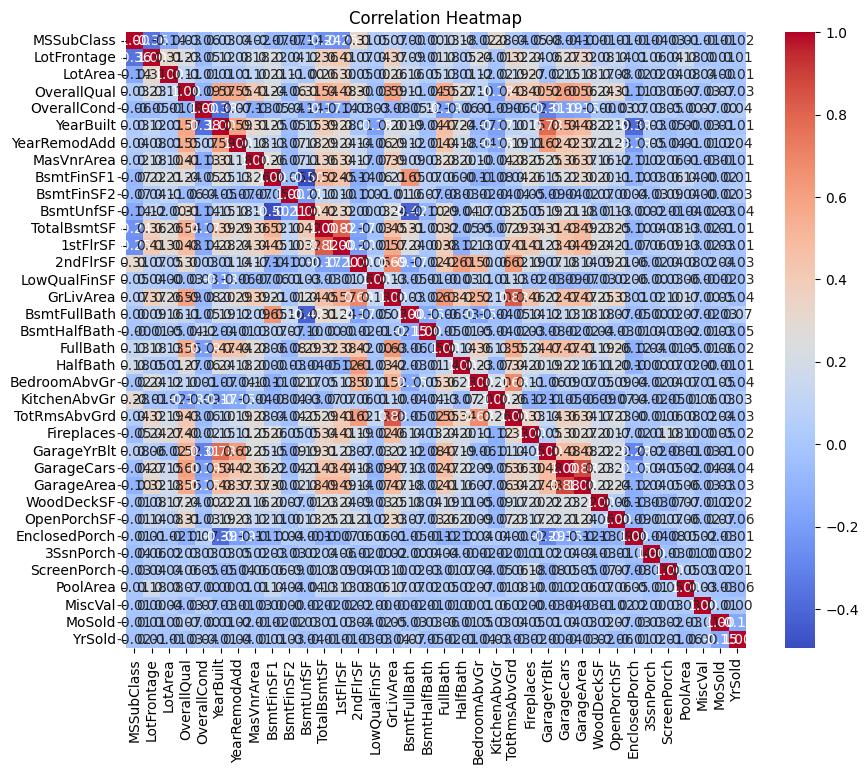

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = train1.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

## **Regression**

In [ ]:
from sklearn.metrics import accuracy_score #higher is good
from sklearn.metrics import mean_squared_error #lower is good

In [ ]:
from sklearn.linear_model import LinearRegression
lir= LinearRegression()
lir.fit(x_train, y_train)
y_pred = lir.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%")

Mean Squared Error: 1294562598.298418


In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.1)
las.fit(x_train, y_train)
y_pred = las.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1294569234.1769638


In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge
rid = Ridge(alpha=1.0)
rid.fit(x_train, y_train)
y_pred = rid.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1294124226.8659315


In [ ]:
y_pred.shape

(292,)

In [ ]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet
elas = ElasticNet(alpha=0.1, l1_ratio=0.5)
elas.fit(x_train, y_train)
y_pred = elas.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1257679497.3619573


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.504e+11, tolerance: 7.116e+08
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1304878696.989726


In [ ]:
from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 800013755.0649749


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 594474477.694445


In [ ]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7247497238.152533


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 806723185.2068632


In [ ]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()
lgb.fit(x_train,y_train)
y_pred=lgb.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3078
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 67
[LightGBM] [Info] Start training from score 182208.341610
Mean Squared Error: 796955016.7404598


In [ ]:
from sklearn.neural_network import MLPRegressor
# mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)
mlp = MLPRegressor()
mlp.fit(x_train,y_train)
y_pred=mlp.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2451081996.211112


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


confession matrix for classification

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# cm = confusion_matrix(y_test, y_pred)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()

In [ ]:
#pip install pygam

In [ ]:
# from pygam import LinearGAM,s
# gam =LinearGAM(s(0) + s(1) + s(2))
# mlp.fit(x_train,y_train)
# y_pred=mlp.predict(x_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2707047417.7375345


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model
poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly.fit(x_train, y_train)
y_pred = poly.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3805197978748.6978


## **For Test Data**

In [ ]:
t=test

In [ ]:
numerical_columns = t.select_dtypes(include=['float64', 'int64']).columns
for i in numerical_columns:
    t[i].fillna(t[i].mean(), inplace=True)

categorical_columns = t.select_dtypes(include=['object']).columns
for i in categorical_columns:
    t[i].fillna(t[i].mode()[0], inplace=True)

In [ ]:
t.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [ ]:
t.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
t.drop(['Id','Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
t

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in your dataset
for column in t.columns:
    # Check if the column dtype is 'object' (i.e., categorical)
    if t[column].dtype == 'object':
        # Encode the values in the column and replace them with encoded values
        t[column] = label_encoder.fit_transform(t[column])

In [ ]:
rid.fit(X,Y)
y_pred=rid.predict(test)

In [ ]:
y_pred

array([104838.83840467, 152041.55350032, 166290.17148384, ...,
       143012.75173626, 114103.48251585, 246402.22412837])

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming you have a DataFrame 'df' with true labels 'y_true' and predicted labels 'y_pred' for each column
# # 'columns' contains the names of all columns in your DataFrame

# for column in train.columns:
#     y_true = train[column]  # True labels for the current column
#     y_pred = rid.predict(test)# Predicted labels for the current column

#     # Compute confusion matrix for the current column
#     cm = confusion_matrix(y_true, y_pred)

#     # Plot confusion matrix for the current column
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
#     plt.title(f"Confusion Matrix for {column}")
#     plt.xlabel("Predicted Labels")
#     plt.ylabel("True Labels")
#     plt.show()


In [ ]:
y_pred.shape

(1459,)

In [ ]:
sample1=sample

In [ ]:
sample1['SalePrice']=y_pred

In [ ]:
sample1

,Id,SalePrice
0,1461,104838.838405
1,1462,152041.553500
2,1463,166290.171484
3,1464,184184.250499
4,1465,186839.258854
...,...,...
1454,2915,64306.033303
1455,2916,56274.911404
1456,2917,143012.751736
1457,2918,114103.482516


In [ ]:
sample1.to_csv('submit_1.csv',index=False)

## **ANN**

In [ ]:
x_train = x_train.astype(np.int32)
y_train = y_train.astype(np.int32)
x_test = x_test.astype(np.int32)
y_test = y_test.astype(np.int32)
test=test.astype(np.int32)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(10000, activation='relu',input_dim=73))
model.add(Dense(7000, activation='relu'))
model.add(Dense(6000, activation='relu'))
model.add(Dense(5000, activation='relu'))
model.add(Dense(5000, activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10000)             740000    
                                                                 
 dense_25 (Dense)            (None, 7000)              70007000  
                                                                 
 dense_26 (Dense)            (None, 6000)              42006000  
                                                                 
 dense_27 (Dense)            (None, 5000)              30005000  
                                                                 
 dense_28 (Dense)            (None, 5000)              25005000  
                                                                 
 dense_29 (Dense)            (None, 2000)              10002000  
                                                                 
 dense_30 (Dense)            (None, 1000)             

In [ ]:
model.compile(loss='mse',optimizer='Adam')

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1)

37/37 [==============================] - 128s 3s/step - loss: 22330593280.0000 - val_loss: 6078738944.0000


In [ ]:
X =X.astype(np.int32)
Y = Y.astype(np.int32)
model.fit(X,Y,epochs=1)

46/46 [==============================] - 161s 3s/step - loss: 3231065600.0000


In [ ]:
model.layers[1].get_weights()

[array([[ 6.0831741e-03, -1.9017763e-02,  6.3314033e-03, ...,
         -2.2527264e-02,  5.0238757e-03,  1.7461263e-02],
        [-1.7535523e-02,  6.0119308e-03,  2.0384638e-02, ...,
         -2.9335860e-03, -2.2948959e-03, -3.8146256e-03],
        [ 6.1319210e-03,  1.3879672e-02, -9.6594272e-03, ...,
          1.6457468e-02,  1.4865186e-02,  3.2772589e-03],
        ...,
        [-1.8947635e-02, -1.6826585e-02, -1.9265335e-02, ...,
          1.1235536e-02, -9.2477370e-03,  3.0857548e-03],
        [-1.2144677e-02, -1.5535767e-03, -1.5989361e-02, ...,
         -1.7440367e-02, -9.4748590e-05, -1.8243279e-02],
        [ 4.5926869e-04, -1.0421171e-02, -6.1387662e-03, ...,
          2.4001505e-03, -2.7731881e-03, -1.7954582e-02]], dtype=float32),
 array([-0.00448485, -0.00453576, -0.00451513, ..., -0.00447932,
        -0.0044603 ,  0.        ], dtype=float32)]

In [ ]:
y_pred1=model.predict(test)

46/46 [==============================] - 15s 323ms/step


In [ ]:
y_pred1

array([[166290.56],
       [108634.02],
       [219113.31],
       ...,
       [219341.45],
       [139947.47],
       [251811.84]], dtype=float32)

In [ ]:
y_pred1.shape

(1459, 1)

In [ ]:
sample2 = sample

In [ ]:
sample2['SalePrice']=y_pred1

In [ ]:
sample2

,Id,SalePrice
0,1461,166290.562500
1,1462,108634.023438
2,1463,219113.312500
3,1464,217270.843750
4,1465,189370.843750
...,...,...
1454,2915,124729.320312
1455,2916,136179.062500
1456,2917,219341.453125
1457,2918,139947.468750


In [ ]:
sample2.to_csv('submit_2.csv',index=False)